In [313]:
import numpy as np 
import matplotlib.pyplot as plt

In [314]:
X = np.array([
    [0, 0],
    [1, 0],
    [0, 1],
    [1, 1]
])

y = np.array([
    [0],
    [1],
    [1],
    [0],
])

W1 = np.array([
    [0.2, 0.9],
    [-0.9, 0.8]
])

b1 = np.array([
    [-0.3, 0.2]
])

W2 = np.array([
    [-0.2, -0.9],
])

b2 = np.array([
    [0.7]
])

In [315]:
def aktivacijska_fn1(z): # korištena je u sakrivenom sloju
    return 2/(1+np.exp(-z)) - 1

def aktivacijska_fn1_derivacija(z):
    return 0.5*(1-np.square(z))

def aktivacijska_fn2(z): # korištena u izlaznom sloju
    return 1/(1+np.exp(-z))
    
def aktivacijska_fn2_derivacija(z):
    return z*(1-z)

In [316]:
def forward(z):
    h = z @ W1.T + b1
    H = aktivacijska_fn1(h) 
    o = H @ W2.T + b2
    O = aktivacijska_fn2(o)

    return O

In [317]:
BROJ_ITERACIJA = 300
loss_history = []
learning_rate = 1
momentum = 0.9

vW1 = np.zeros_like(W1)
vW2 = np.zeros_like(W2)
vb1 = np.zeros_like(b1)
vb2 = np.zeros_like(b2)

for i in range(BROJ_ITERACIJA):
    # forward
    h = X @ W1.T + b1
    H = aktivacijska_fn1(h) 
    o = H @ W2.T + b2
    O = aktivacijska_fn2(o)

    # backprop
    error = y - O 
    do = error * aktivacijska_fn2_derivacija(O)
    dH = do @ W2
    dh = dH * aktivacijska_fn1_derivacija(H)
    dW2 = do.T @ H
    dW1 = dh.T @ X
    db2 = do.sum()
    db1 = dh.mean(axis=0)

    # momentum
    vW2 = learning_rate * dW2 + momentum * vW2
    vW1 = learning_rate * dW1 + momentum * vW1
    vb2 = learning_rate * db2 + momentum * vb2
    vb1 = learning_rate * db1 + momentum * vb1

    # optimization step
    W2 += vW2
    W1 += vW1
    b2 += vb2
    b1 += vb1
    
    # loss
    MS = np.mean(np.square(error))
    RMS = np.sqrt(MS)
    NRMS = RMS / np.sqrt(np.mean(np.square(O - np.mean(y))))
    
    loss = RMS
    loss_history.append(loss)

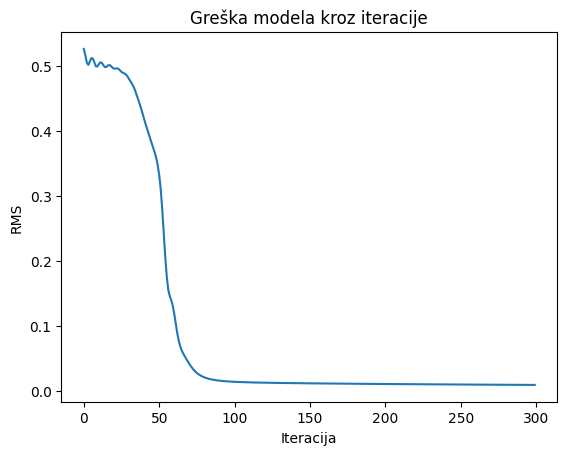

In [318]:
plt.plot(range(BROJ_ITERACIJA), loss_history)
plt.xlabel("Iteracija")
plt.ylabel("RMS")
plt.title("Greška modela kroz iteracije")
plt.show()

In [319]:
print(f"Konačan gubitak (RMS): {loss}")

Konačan gubitak (RMS): 0.009297661385321144


In [320]:
preds = forward(X).tolist()
for i, o in enumerate(preds):
    print(f'Ulazna vrijednost: {X[i]} --> Izlazna vrijednost: {o[0]:.3f}')

Ulazna vrijednost: [0 0] --> Izlazna vrijednost: 0.011
Ulazna vrijednost: [1 0] --> Izlazna vrijednost: 0.989
Ulazna vrijednost: [0 1] --> Izlazna vrijednost: 0.990
Ulazna vrijednost: [1 1] --> Izlazna vrijednost: 0.002
